<a href="https://colab.research.google.com/github/valterbar/ESTATISTICA/blob/main/PROJ_bxRELACAORL_CASAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
















In [41]:
# Lendo os dados
path= r'/content/drive/MyDrive/DESCOMPOS23/MODULO III DESCOMP/KAGGLE 20JAN24/data.csv'
df = pd.read_csv(path)

In [42]:
df.columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [43]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


neste arquivo a relacao muito baixa parece que nem vai dar para aplicar RL

<ipython-input-44-d38b9b3d81c9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True)


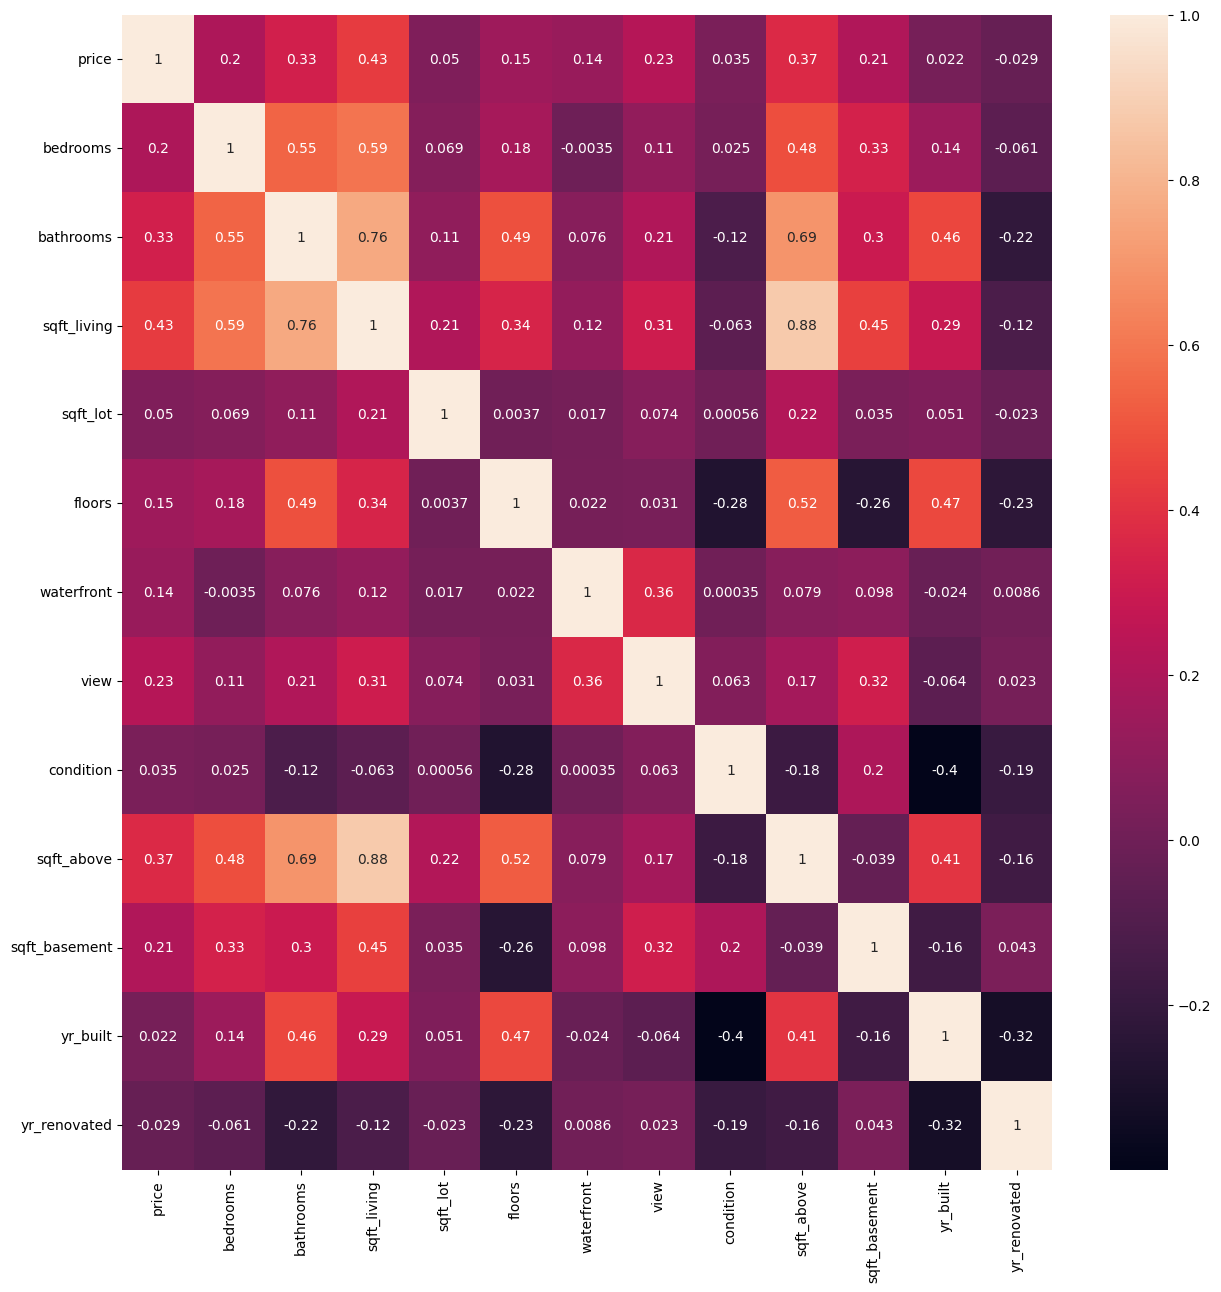

In [44]:
import matplotlib.pyplot as plt
fig,  ax = plt.subplots(figsize= (15,15))
ax = sns.heatmap(df.corr(), annot=True)

In [40]:
# Drop nas colunas desnecessárias e deixando apenas as que vamos analisar
df = df[['price','sqft_living']]

In [12]:
df.head()


,price,sqft_living
0,313000.0,1340
1,2384000.0,3650
2,342000.0,1930
3,420000.0,2000
4,550000.0,1940


In [20]:
# Dividindo os dados em conjuntos de treino e teste
X = df[['sqft_living']] ## nossa feature - variavel independente
y = df['price'] ##nosso alvo - variavel target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Criando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [22]:
# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Exibindo os coeficientes do modelo
print(f'Coeficiente angular (inclinação): {modelo.coef_[0]}')
print(f'Coeficiente linear (interceptação): {modelo.intercept_}')

Coeficiente angular (inclinação): 267.2236582373267
Coeficiente linear (interceptação): -26048.2093954297


In [35]:
####cria dataframe com valores previstos e reais##############3
df_comparacao= pd.DataFrame({'valores previstos': y_pred.flatten(), 'valores reais'   :y_test.values.flatten()})
print(df_comparacao.head(10))

   valores previstos  valores reais
0      364098.331631   5.440000e+05
1      508399.107079   0.000000e+00
2      759589.345822   1.712500e+06
3      561843.838727   3.650000e+05
4      433576.482773   2.750000e+05
5      727522.506834   6.250000e+05
6      540465.946068   4.530000e+05
7      532449.236321   3.000000e+05
8      527104.763156   4.179857e+05
9      537793.709485   6.725000e+05


In [34]:
# Calculando e exibindo métricas de avaliação
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R²:", metrics.r2_score(y_test, y_pred))


MAE: 225375.25345857345
MSE: 990204087727.1417
RMSE: 995089.9897633087
R²: 0.029065410341410414


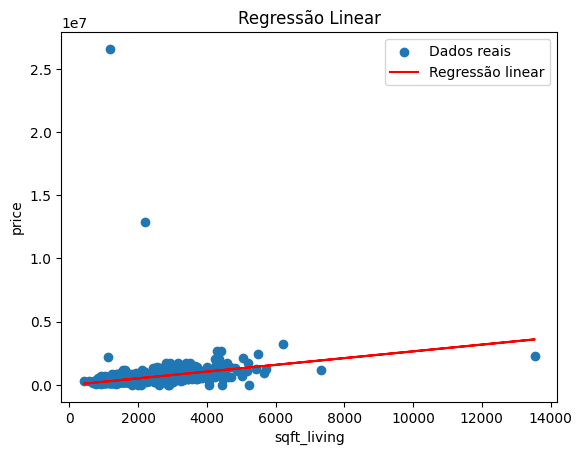

In [25]:
# Plotando os resultados
plt.scatter(X_test, y_test, label='Dados reais')
plt.plot(X_test, y_pred, label='Regressão linear', color='red')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Regressão Linear')
plt.legend()
plt.show()



>xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx????????????????????????XXXXXXXXXXXXXXXXX
 abaixo faremos teste mudandos base de dados , colocando mapa calor


*   Item da lista
*   Item da lista





In [26]:
import statsmodels.api as sm

In [32]:
##adiconar uma coluna de constanes ao dados de treinamento
X_train= sm.add_constant(X_train)
modelo= sm.OLS(y_train, X_train)
results = modelo.fit()

print (results.summary())

TypeError: unsupported operand type(s) for -: 'OLS' and 'OLS'